#[Tony_botros____Abd_alraoof_hashas___Abdalla_azzabadanie]
#[طوني_بطري___عبد_الرؤوف_حسحس____عبدالله_الزبداني]

<h1 style="text-align: center;">Data Exploratory Analysis and Processing<h1>

Prepare libraries

In [56]:
# here put every import you need e.g. import pandas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
import re
from rapidfuzz.distance import Levenshtein, LCSseq, DamerauLevenshtein, Jaro
# from IPython.display import Image
import jellyfish
from scipy.spatial.distance import pdist, squareform
from nltk.util import ngrams
import rapidfuzz.fuzz
# it's better to load what you need from the package by from [] import [] instead of import the whole package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes  import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
import seaborn as sns


Download data

<h2 dir="rtl">مثال عن كيفية تنظيم حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [2]:
# your code here



<div dir="rtl">الاستنتاج<div>

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Data Cleaning & Integration

## [a] Fill Gaps

### [1]

# قمنا بقراءة كل ملف هنا

In [57]:
chicago_cbd_boundary = pd.read_csv('data/chicago-CBD-boundary.csv')
chicago_police_beat_boundries = pd.read_csv('data/chicago-police-beat-boundries.csv')
chicago_street_center_lines = pd.read_csv('data/chicago-street-center-lines.csv')
traffic_crashes_people = pd.read_csv('data/traffic-crashes-people.csv')
traffic_crashes_vehicles = pd.read_csv('data/traffic-crashes-vehicles.csv')
traffic_crashes = pd.read_csv('data/traffic-crashes.csv')

C:\Users\Tony\AppData\Local\Temp\ipykernel_10892\906444287.py:4: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_crashes_people = pd.read_csv('data/traffic-crashes-people.csv')
C:\Users\Tony\AppData\Local\Temp\ipykernel_10892\906444287.py:5: DtypeWarning: Columns (17,19,38,39,40,42,46,47,48,51,53,56,57,58,59,69) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_crashes_vehicles = pd.read_csv('data/traffic-crashes-vehicles.csv')


# هنا نقوم بإزالة الأعمدة التي لانحتاج لها

## For chicago_cbd_boundary file

- delete it all cause it has only one row

In [4]:
chicago_cbd_boundary=[]

## For chicago_police_beat_boundries file

**Keep:**
- the rest

**Delete:**
- the_geom

In [5]:
chicago_police_beat_boundries.drop(columns="the_geom", inplace=True)

## For chicago_street_center_lines File

**Keep:**
- PRE_DIR, STREETNAME STREET_TYP, CLASS: usefull.
- ONEWAY_DIR: mau be usefull.
- DIR_TRAVEL.
- L_FIPS, R_FIPS.
- LENGTH

**Delete:**
- the_geom, FNODE_ID, TNODE_ID, TRANS_ID, STREET_NAM, 'L_F_ADD', 'L_T_ADD', 'R_F_ADD', 'R_T_ADD','LOGICLF', 'LOGICLT', 'LOGICRF', 'LOGICRT': notusefull
- STATUS: most values N it accurdes bias.
- STATUS_DAT: not usefull.
- TIERED: bias
- EWNS, EWNS_DIR, EWNS_COORD: not usefull
- R_FIPS, R_ZIP,L_ZIP, R_CENSUSBL, L_CENSUSBL, F_CROSS, F_CROSS_ST, T_CROSS, T_CROSS_ST, EDIT_DATE, EDIT_TYPE: not usefull
- FLAG_STRIN, CREATE_TIM, UPDATE_TIM, SHAPE_LEN: not usefull.
- CREATE_USE, UPDATE_USE: most values are EXISTING  --> bias.


In [6]:
columns_to_drop = ['the_geom', 'FNODE_ID', 'TNODE_ID', 'TRANS_ID', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD', 'R_T_ADD',
                   'LOGICLF', 'LOGICLT', 'LOGICRF', 'LOGICRT', 'STATUS', 'STATUS_DAT', 'TIERED', 'EWNS', 'EWNS_DIR', 
                   'EWNS_COORD', 'R_FIPS', 'R_ZIP', 'L_ZIP', 'R_CENSUSBL', 'L_CENSUSBL', 'F_CROSS_ST', 
                   'T_CROSS_ST', 'EDIT_DATE', 'EDIT_TYPE', 'FLAG_STRIN', 'CREATE_TIM', 'UPDATE_TIM', 'STREETNAME',
                   'SHAPE_LEN', 'CREATE_USE', 'UPDATE_USE']
#'STREET_NAM', , 'F_CROSS','T_CROSS',
chicago_street_center_lines.drop(columns=columns_to_drop, inplace=True)


## For traffic-crashes-people File

**Keep:**
- CRASH_DATE: useful for understanding when accidents occur.
- CITYو STATE: to know whch city, state have the most number of accidents.
- SEX: usually men are best in driving than women.
- AGE: usefull to know if the person is conscious.
- DRIVERS_LICENSE_STATE: to know if there were states gives false credible market certificate.
- DRIVER_ACTION: usefull.
- DRIVER_VISION, PHYSICAL_CONDITION: very important.
-  VEHICLE_ID


**Delete:**
- PERSON_ID, PERSON_TYPE, CRASH_RECORD_ID, SEAT_NO: not usefull
- ZIPCODE: not usefull.
- DRIVERS_LICENSE_CLASS: not usefull and most values are nan.
- SAFETY_EQUIPMENT, AIRBAG_DEPLOYED: don't stop the accident it's just keep the person in safe.
- EJECTION, INJURY_CLASSIFICATION, HOSPITAL, EMS_AGENCY, EMS_RUN_NO: not usefull.
- PEDPEDAL_ACTION, PEDPEDAL_VISIBILITY, PEDPEDAL_LOCATION: most values are nan and it's not important.


In [7]:
columns_to_drop =['PERSON_ID', 'SEAT_NO','EJECTION', 
                  'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY',
                  'EMS_RUN_NO','PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
                  'PEDPEDAL_LOCATION','CELL_PHONE_USE','BAC_RESULT VALUE']


traffic_crashes_people.drop(columns_to_drop ,axis=1,inplace=True)

## For traffic_crashes_vehicles file
**Keep:**

- CRASH_DATE: useful for understanding when accidents occur.
- UNIT_TYPE: useful for identifying the types of vehicles involved in accidents.
- VEHICLE_DEFECT: important for determining if vehicle condition contributed to the accident.
- VEHICLE_TYPE: may be useful for identifying which types of vehicles are most frequently involved in accidents.
- MANEUVER: helpful for understanding the actions or maneuvers involved in accidents.
- EXCEED_SPEED_LIMIT_I: crucial for identifying if speed was a factor in accidents.
- FIRST_CONTACT_POINT: potentially useful for understanding the initial points of contact in accidents.

**Delete:**

- CRASH_UNIT_ID: not useful for analysis.
- CRASH_RECORD_ID: not relevant for understanding accident factors.
- UNIT_NO: not informative for analysis.
- NUM_PASSENGERS: not relevant to accident characteristics.
- VEHICLE_ID: not important for analysis.
- CMRC_VEH_I: not significant for understanding accident factors.
- MAKE, MODEL, LIC_PLATE_STATE, VEHICLE_YEAR: not relevant to accident analysis.
- VEHICLE_USE: not important for understanding accident causes.
- TRAVEL_DIRECTION: not informative as accidents can occur in any direction.
- TOWED_I, TOWED_TO, TOWED_BY, FIRE_I: not useful for analyzing accident factors.
- OCCUPANT_CNT: not relevant to understanding accident causes.

In [8]:
columns_to_drop =['UNIT_NO','VEHICLE_ID',
                  'CMRC_VEH_I','MAKE','MODEL','LIC_PLATE_STATE',
                  'VEHICLE_USE','TRAVEL_DIRECTION','TOWED_I','TOWED_TO','TOWED_BY',
                  'FIRE_I','OCCUPANT_CNT']
traffic_crashes_vehicles.drop(columns_to_drop,axis=1,inplace=True)

## For traffic_crashes file
**Keep:**  

- CRASH_DATE: Important for understanding the timing of accidents.  
- POSTED_SPEED_LIMIT: Helps in knowing the speed at the time of the accident.  
- TRAFFIC_CONTROL_DEVICE: Provides insights into the presence and condition of traffic control devices.  
- DEVICE_CONDITION: Crucial for identifying if device malfunction contributed to the accident.  
- WEATHER_CONDITION: Vital for understanding weather-related factors influencing accidents.  
- LIGHTING_CONDITION: Significant for assessing visibility conditions.  
- TRAFFICWAY_TYPE: Useful for understanding the type of road where accidents occur.  
- LANE_CNT: Provides information about the number of lanes at the accident location.  
- ALIGNMENT: Useful for understanding street alignment.  
- ROADWAY_SURFACE_COND: Helps in understanding road surface conditions.  
- ROAD_DEFECT: Provides insights into road defects contributing to accidents.  
- REPORT_TYPE: Useful for understanding the type of crash report.  
- INTERSECTION_RELATED_I: Indicates if the accident occurred at an intersection.  
- NOT_RIGHT_OF_WAY_I: Helps in determining right-of-way violations.  
- DATE_POLICE_NOTIFIED: Important for understanding when the police were notified of the accident.  
- PRIM_CONTRIBUTORY_CAUSE: Provides insights into the primary contributing cause of the accident.  
- SEC_CONTRIBUTORY_CAUSE: May provide additional insights into contributing factors.  
- CRASH_HOUR: Useful for identifying peak accident hours.  
- CRASH_MONTH: Helps in understanding seasonal patterns of accidents.  

**Delete:**  
- CRASH_RECORD_ID: Not essential for understanding accident reasons.  
- CRASH_DATE_EST_I: Can be replaced with DATE_POLICE_NOTIFIED.  
- FIRST_CRASH_TYPE: Not crucial for analysis.  
- CRASH_TYPE: Not useful as the accident has already occurred.  
- HIT_AND_RUN_I: Not useful for analysis.  
- DAMAGE: Not relevant for understanding accident circumstances.  
- STREET_DIRECTION, STREET_NAME, BEAT_OF_OCCURRENCE: Not useful for analysis.  
- PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I: Not essential for understanding accident causes.  
- WORK_ZONE_TYPE, WORKERS_PRESENT_I: Not useful for predicting accidents.  
- MOST_SEVERE_INJURY, INJURIES_TOTAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION, INJURIES_UNKNOWN: Not relevant for understanding accident circumstances.  
- LATITUDE, LONGITUDE, LOCATION: Not useful for analysis.  

In [9]:
# columns_to_drop =['CRASH_RECORD_ID','CRASH_DATE_EST_I','FIRST_CRASH_TYPE','CRASH_TYPE',
#                   'HIT_AND_RUN_I','DAMAGE','STREET_DIRECTION','STREET_NAME','BEAT_OF_OCCURRENCE',
#                   'BEAT_OF_OCCURRENCE','STATEMENTS_TAKEN_I','PHOTOS_TAKEN_I','DOORING_I','WORK_ZONE_TYPE',
#                   'WORKERS_PRESENT_I','INJURIES_TOTAL','MOST_SEVERE_INJURY','INJURIES_INCAPACITATING',
#                   'INJURIES_NON_INCAPACITATING','INJURIES_NO_INDICATION','INJURIES_UNKNOWN',
#                   'LATITUDE','LONGITUDE','LOCATION']
# traffic_crashes.drop(columns_to_drop,axis=1,inplace=True)

# قمنا بدمج الملفات هنا لتصبح كل الداتا بجدول واحد

In [10]:
# conc_df = pd.concat([chicago_police_beat_boundries,chicago_street_center_lines,traffic_crashes_people,traffic_crashes_vehicles,traffic_crashes])
# # conc_df.reset_index(drop=True,inplace=True)

In [11]:
# conc_df.columns

In [12]:
# columns_to_drop = ['the_geom', 'FNODE_ID', 'TNODE_ID', 'TRANS_ID', 'STREET_NAM', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD', 'R_T_ADD',
#                    'LOGICLF', 'LOGICLT', 'LOGICRF', 'LOGICRT', 'STATUS', 'STATUS_DAT', 'TIERED', 'EWNS', 'EWNS_DIR', 
#                    'EWNS_COORD', 'R_FIPS', 'R_ZIP', 'L_ZIP', 'R_CENSUSBL', 'L_CENSUSBL', 'F_CROSS', 'F_CROSS_ST', 
#                    'T_CROSS', 'T_CROSS_ST', 'EDIT_DATE', 'EDIT_TYPE', 'FLAG_STRIN', 'CREATE_TIM', 'UPDATE_TIM', 
#                    'SHAPE_LEN', 'CREATE_USE', 'UPDATE_USE','PERSON_ID','PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'SEAT_NO','ZIPCODE','DRIVERS_LICENSE_CLASS','SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED','EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO','PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION',
#                    'CRASH_UNIT_ID','CRASH_RECORD_ID','UNIT_NO','VEHICLE_ID','CMRC_VEH_I','MAKE','MODEL','LIC_PLATE_STATE','VEHICLE_YEAR','VEHICLE_USE','TRAVEL_DIRECTION','TOWED_I','TOWED_TO','TOWED_BY','FIRE_I','OCCUPANT_CNT',
#                    'CRASH_RECORD_ID','CRASH_DATE_EST_I','FIRST_CRASH_TYPE','CRASH_TYPE','HIT_AND_RUN_I','DAMAGE','STREET_DIRECTION','STREET_NAME','BEAT_OF_OCCURRENCE','BEAT_OF_OCCURRENCE','STATEMENTS_TAKEN_I','PHOTOS_TAKEN_I','DOORING_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','INJURIES_TOTAL','MOST_SEVERE_INJURY','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','LATITUDE','LONGITUDE','LOCATION']


# conc_df.drop(columns=columns_to_drop,inplace=True,axis=1)

In [13]:
# conc_df

# هنا نقوم بتعبئة القيم الفارغة

### [2]

مشكلة القيم الفارغه

# chicago_police_beat_boundries 

In [14]:
# chicago_police_beat_boundries 

In [15]:
chicago_police_beat_boundries.shape

(277, 4)

In [16]:
chicago_police_beat_boundries .dtypes

DISTRICT    int64
SECTOR      int64
BEAT        int64
BEAT_NUM    int64
dtype: object

In [17]:
chicago_police_beat_boundries .nunique()

DISTRICT     23
SECTOR        5
BEAT          5
BEAT_NUM    275
dtype: int64

In [18]:
chicago_police_beat_boundries.isnull().sum()

DISTRICT    0
SECTOR      0
BEAT        0
BEAT_NUM    0
dtype: int64

In [19]:
chicago_police_beat_boundries.to_csv('clean_data/chicago_police_beat_boundries.csv', index=False)

### القيم المتطرفة

In [20]:
def outliers_number(column, data):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


def plotbox_outliers_number(column, data):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[column].dropna())
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()


def outliers_string(column, data):
    value_counts = data[column].value_counts()
    rare_values = value_counts[value_counts <= 2].index.tolist()
    outliers = data[data[column].isin(rare_values)]
    return outliers
    

In [21]:
# data_cleaned = data[~data[column].isin(outliers[column])]
# chicago_police_beat_boundries

### القيم المتناقضة

In [22]:
# chicago_police_beat_boundries['']

# chicago_street_center_lines 

In [23]:
# chicago_street_center_lines 

In [24]:
chicago_street_center_lines.shape

(55747, 15)

In [25]:
chicago_street_center_lines .dtypes

PRE_DIR        object
STREET_NAM     object
STREET_TYP     object
SUF_DIR        object
CLASS          object
ONEWAY_DIR     object
DIR_TRAVEL     object
L_PARITY       object
R_PARITY       object
F_ZLEV          int64
T_ZLEV          int64
L_FIPS          int64
F_CROSS        object
T_CROSS        object
LENGTH        float64
dtype: object

In [26]:
chicago_street_center_lines .nunique()

PRE_DIR           4
STREET_NAM     1649
STREET_TYP       22
SUF_DIR          11
CLASS            11
ONEWAY_DIR        4
DIR_TRAVEL        3
L_PARITY          2
R_PARITY          2
F_ZLEV            5
T_ZLEV            5
L_FIPS           25
F_CROSS       48341
T_CROSS       48379
LENGTH        55747
dtype: int64

In [27]:
chicago_street_center_lines.isnull().sum()

PRE_DIR         454
STREET_NAM      454
STREET_TYP     1254
SUF_DIR       53485
CLASS             0
ONEWAY_DIR    36452
DIR_TRAVEL        0
L_PARITY        404
R_PARITY        404
F_ZLEV            0
T_ZLEV            0
L_FIPS            0
F_CROSS           0
T_CROSS           0
LENGTH            0
dtype: int64

- قمنا بحذف عامود SUF_DIR لأن القيم الفارغة الموجودة فيه تشكل %96 
- قمنا بحذف عامود ONEWAY_DIR لأن القيم الفارغة الموجودة فيه تشكل %65 

In [28]:
chicago_street_center_lines.drop(columns=['SUF_DIR','ONEWAY_DIR'],inplace=True)

In [29]:
chicago_street_center_lines.describe()

,F_ZLEV,T_ZLEV,L_FIPS,LENGTH
count,55747.000000,55747.000000,55747.000000,55747.000000
mean,-0.018835,-0.018153,14143.281809,422.083657
std,0.245734,0.245785,2622.277720,234.316376
min,-2.000000,-2.000000,0.000000,6.911068
25%,0.000000,0.000000,14000.000000,312.710726
50%,0.000000,0.000000,14000.000000,336.150284
75%,0.000000,0.000000,14000.000000,652.164814
max,2.000000,2.000000,70122.000000,8959.034042


In [30]:
chicago_street_center_lines.describe(include='object')

,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,DIR_TRAVEL,L_PARITY,R_PARITY,F_CROSS,T_CROSS
count,55293,55293,54493,55747,55747,55343,55343,55747,55747
unique,4,1649,22,11,3,2,2,48341,48379
top,W,WESTERN,AVE,4,B,O,E,||DEAD END||,||DEAD END||
freq,20941,391,25735,37506,36455,38216,38349,1351,1509


In [31]:
chicago_street_center_lines.loc[(chicago_street_center_lines['STREET_NAM'].notnull())&(chicago_street_center_lines['R_PARITY'].isnull())] 

,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,DIR_TRAVEL,L_PARITY,R_PARITY,F_ZLEV,T_ZLEV,L_FIPS,F_CROSS,T_CROSS,LENGTH
20560,N,WOLF,RD,99,B,NaN,NaN,0,0,14000,||DEAD END||,6901|N|||,1646.733987
30897,N,PATTON,DR,99,B,NaN,NaN,0,0,14000,0| | | |,0| | | |,370.913469
30898,N,PATTON,DR,99,B,NaN,NaN,0,0,14000,0| | | |,0| | | |,675.760514
53188,E,WACKER SUB,DR,7,B,NaN,NaN,-2,-2,14000,349|N|STETSON SUB|AVE|,399|E|||,477.483349
53189,E,WACKER SUB,DR,7,B,NaN,NaN,-2,-2,14000,0||||,299|N|FIELD|BLVD|,917.090007


In [32]:
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM']=='PATTON']

,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,DIR_TRAVEL,L_PARITY,R_PARITY,F_ZLEV,T_ZLEV,L_FIPS,F_CROSS,T_CROSS,LENGTH
17077,N,PATTON,AVE,4,F,E,O,0,0,14000,8422|W|WINDSOR|AVE|,8421|W|WILSON|AVE|,319.248827
30897,N,PATTON,DR,99,B,NaN,NaN,0,0,14000,0| | | |,0| | | |,370.913469
30898,N,PATTON,DR,99,B,NaN,NaN,0,0,14000,0| | | |,0| | | |,675.760514
34897,N,PATTON,AVE,4,B,E,O,0,0,14000,8417|W|CASTLEISLAND|AVE|,8422|W|WINDSOR|AVE|,252.266256


In [33]:
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM']=='PATTON','L_PARITY']='E'
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM']=='PATTON','R_PARITY']='O'

In [34]:
chicago_street_center_lines[chicago_street_center_lines['STREET_NAM']== 'WOLF'] ## لازم نخلي التوقيت  

,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,DIR_TRAVEL,L_PARITY,R_PARITY,F_ZLEV,T_ZLEV,L_FIPS,F_CROSS,T_CROSS,LENGTH
19197,N,WOLF,RD,99,B,E,O,0,0,14000,0|N|||,6937|N|||,345.822300
20560,N,WOLF,RD,99,B,NaN,NaN,0,0,14000,||DEAD END||,6901|N|||,1646.733987
35158,N,WOLF,RD,99,B,E,O,0,0,14000,6935|N|||,||DEAD END||,768.688246


In [35]:
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'] == 'WOLF', 'L_PARITY'] = 'E'
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'] == 'WOLF', 'R_PARITY'] = 'O'

In [36]:
chicago_street_center_lines[chicago_street_center_lines['STREET_NAM']=='WACKER SUB'	] 

,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,DIR_TRAVEL,L_PARITY,R_PARITY,F_ZLEV,T_ZLEV,L_FIPS,F_CROSS,T_CROSS,LENGTH
53188,E,WACKER SUB,DR,7,B,NaN,NaN,-2,-2,14000,349|N|STETSON SUB|AVE|,399|E|||,477.483349
53189,E,WACKER SUB,DR,7,B,NaN,NaN,-2,-2,14000,0||||,299|N|FIELD|BLVD|,917.090007
53201,E,WACKER SUB,DR,7,B,E,O,-2,-2,14000,||DEAD END||,349|N|STETSON SUB|AVE|,121.526155


In [37]:
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'] == 'WACKER SUB', 'L_PARITY'] = 'E'
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'] == 'WACKER SUB', 'R_PARITY'] = 'O'

In [38]:
# data = chicago_street_center_lines.drop(columns=['PRE_DIR', 'STREET_TYP',  'L_PARITY', 'R_PARITY','T_CROSS','F_CROSS','T_ZLEV','L_FIPS'],axis=1)
# label_encoders = {}
# for column in [ 'DIR_TRAVEL','CLASS','F_ZLEV','LENGTH']:
#     le = LabelEncoder()
#     data[column] = le.fit_transform(data[column])
#     label_encoders[column] = le

# data_not_missing = data.dropna(subset=['STREET_NAM'])

# street_nam_le = LabelEncoder()
# data_not_missing.loc[:, 'STREET_NAM'] = street_nam_le.fit_transform(data_not_missing['STREET_NAM'])

# X = data_not_missing.drop(columns=['STREET_NAM'])
# y = data_not_missing['STREET_NAM']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')


In [39]:
# data_missing = data[data['STREET_NAM'].isna()]
# predicted_street_nam = model.predict(data_missing.drop(columns=['STREET_NAM']))

# max_label = len(street_nam_le.classes_) - 1
# predicted_street_nam = np.clip(predicted_street_nam, 0, max_label)

# predicted_street_nam_labels = street_nam_le.inverse_transform(predicted_street_nam.astype(int))

# data.loc[data['STREET_NAM'].isna(), 'STREET_NAM'] = predicted_street_nam_labels

In [40]:
null_value=chicago_street_center_lines[chicago_street_center_lines['STREET_NAM'].isnull()]

In [41]:
not_null_value=chicago_street_center_lines.dropna(subset=['STREET_NAM'])

In [42]:
# null_value['CLASS'].value_counts()

In [43]:
# not_null_value['CLASS'].value_counts()

In [44]:
# null_value['F_ZLEV'].value_counts()

In [45]:
# not_null_value['F_ZLEV'].value_counts()

In [46]:
# null_value['T_ZLEV'].value_counts()

In [47]:
# not_null_value['T_ZLEV'].value_counts()

In [48]:
# null_value['L_FIPS'].value_counts()

In [49]:
# not_null_value['L_FIPS'].value_counts()

In [50]:
# null_value['DIR_TRAVEL'].value_counts()

In [51]:
# not_null_value['DIR_TRAVEL'].value_counts()

In [52]:
def extract_value_STREET_NAM(cell): # من أجل اسماء المقاطعات
    # تقسيم النص إلى أجزاء باستخدام الفاصل '|'
    parts = cell.split('|')
    # التأكد من أن النص يحتوي على الأجزاء المطلوبة
    if len(parts) > 2:
        for part in parts[2:]:
            if part.strip() and part.strip() != "DEAD END":  # التحقق من أن الجزء غير فارغ وليس "DEAD END"
                return part.strip()
    return None

def extract_value_STREET_TYP(cell): 
    parts = cell.split('|')
    if len(parts) > 2:
        for part in parts[1:]:
            if part.strip() :  
                return part.strip()
    return None

In [53]:
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'].isnull(), 'F_STREET_NAM'] =chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'].isnull(), 'F_CROSS'].apply(extract_value_STREET_NAM)
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'].isnull(), 'T_STREET_NAM'] =chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'].isnull(), 'T_CROSS'].apply(extract_value_STREET_NAM)

In [54]:
A=chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'].isnull()]
A

,PRE_DIR,STREET_NAM,STREET_TYP,CLASS,DIR_TRAVEL,L_PARITY,R_PARITY,F_ZLEV,T_ZLEV,L_FIPS,F_CROSS,T_CROSS,LENGTH,F_STREET_NAM,T_STREET_NAM
265,NaN,NaN,NaN,99,B,NaN,NaN,0,0,14000,0| |||,0| |||,110.814132,None,None
376,NaN,NaN,NaN,99,B,NaN,NaN,0,0,14000,0|N|PATTON|DR|,||DEAD END||,263.512793,PATTON,None
438,NaN,NaN,NaN,99,B,NaN,NaN,0,0,14000,0| |||,0| |||,31.404554,None,None
443,NaN,NaN,NaN,99,B,NaN,NaN,0,0,14000,0| |||,0| |||,1427.916880,None,None
566,NaN,NaN,NaN,99,B,NaN,NaN,0,0,14000,0| |||,0| |||,169.473171,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55338,NaN,NaN,NaN,3,F,E,E,0,0,14000,0|W|KENNEDY|EXPY|,0|W|KENNEDY|EXPY|,1105.820975,KENNEDY,KENNEDY
55339,NaN,NaN,NaN,3,F,E,E,0,0,14000,0|W|KENNEDY|EXPY|,0| |||,2571.711784,KENNEDY,None
55378,NaN,NaN,NaN,4,B,O,E,0,0,14000,2954|N|HERMITAGE|AVE|,2923|N|WOOD|ST|,121.334989,HERMITAGE,WOOD
55612,NaN,NaN,NaN,99,B,NaN,NaN,0,0,14000,0| |||,0| |||,849.059409,None,None


In [55]:
chicago_street_center_lines.loc[(chicago_street_center_lines['F_STREET_NAM'].notnull())&(chicago_street_center_lines['T_STREET_NAM'].notnull())&(chicago_street_center_lines['T_STREET_NAM']!=chicago_street_center_lines['F_STREET_NAM']),'STREET_NAM']= chicago_street_center_lines['T_STREET_NAM']+' | '+chicago_street_center_lines['F_STREET_NAM']
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'].isnull(), 'STREET_NAM'] = chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'].isnull(), 'F_CROSS'].apply(extract_value_STREET_NAM)
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'].isnull(), 'STREET_NAM'] = chicago_street_center_lines.loc[chicago_street_center_lines['STREET_NAM'].isnull(), 'T_CROSS'].apply(extract_value_STREET_NAM)

In [56]:
chicago_street_center_lines.dropna(subset=['STREET_NAM'], inplace=True)

In [57]:
chicago_street_center_lines.to_csv('clean_data/chicago_street_center_lines.csv', index=False)

## القيم المتناقضة 

In [58]:
chicago_street_center_lines['STREET_TYP'].value_counts()

STREET_TYP
AVE     25735
ST      19869
PL       1880
EXPY     1453
DR       1401
BLVD     1185
RD       1178
ER        671
XR        502
PKWY      198
CT        159
TER        73
RL         55
HWY        45
SR         30
LN         28
PLZ        11
WAY         7
SQ          5
TOLL        4
CRES        2
ROW         2
Name: count, dtype: int64

In [59]:
# STREET_TYP # RD=DR XR=DR|ER|SR RL=? PLZ=PL
chicago_street_center_lines.loc[chicago_street_center_lines['STREET_TYP']=='RD','STREET_TYP']='DR'


# traffic_crashes_people 

In [60]:
# traffic_crashes_people 

In [61]:
# the CITY column: we fill this column with the Most frequent values wich is CHICAGO

most_frequent_city = traffic_crashes_people['CITY'].mode()[0]
traffic_crashes_people['CITY'].fillna(most_frequent_city, inplace=True)

In [62]:
most_frequent_state = traffic_crashes_people['STATE'].mode()[0]
traffic_crashes_people['STATE'].fillna(most_frequent_state, inplace=True)

In [63]:
# to fill the ZIPCODE we can use the mean because all values are int but if there was chars between the values so wen need to use most frequent

numeric_zipcodes = pd.to_numeric(traffic_crashes_people['ZIPCODE'], errors='coerce')
mean = int(numeric_zipcodes.mean())
traffic_crashes_people['ZIPCODE'].fillna(mean,inplace=True)

In [64]:
traffic_crashes_people['SEX'].fillna('X',inplace=True)

In [65]:
# to work with AGE column we notice that there are nagative values so we use the absolute value for each one then fill the missing values

# note: i tried to groupby the sex and age to take the mean for each geander 'F', 'M', 'X' to fill the nulls in age column but i found:

# traffic_crashes_people['SEX'].replace({'M':1,'F':0,'X':2},inplace=True)
# group = traffic_crashes_people[['SEX','AGE']].groupby(['SEX']).mean()
# group
        #  ||
        #  ||
        #  ||
        #  \/

# 	      AGE
# SEX	
# 0.0	37.045107
# 1.0	38.606396
# 2.0	37.529273

# the values are close so i took the mean for whole ages instead 

mean_age = traffic_crashes_people['AGE'].mean()
traffic_crashes_people['AGE'].fillna(mean_age, inplace=True)

for value in traffic_crashes_people['AGE']:
    if value < 0:
        pos_value = np.abs(value)
        traffic_crashes_people['AGE'].replace(value, pos_value, inplace=True)



In [66]:
# to work with the DRIVERS_LICENSE_STATE column We take advantage of the STATE column


for index, value in traffic_crashes_people['DRIVERS_LICENSE_STATE'].items():
    if pd.isna(value):
        # Get corresponding value from 'STATE' column
        new_value = traffic_crashes_people.at[index, 'STATE']
        # Replace NaN with the corresponding value from 'STATE'
        traffic_crashes_people.at[index, 'DRIVERS_LICENSE_STATE'] = new_value


In [67]:
# to deal with  DRIVERS_LICENSE_CLASS we can fill the missing values using the most frequent values 

most_frequent_class = traffic_crashes_people['DRIVERS_LICENSE_CLASS'].mode()[0]
traffic_crashes_people['DRIVERS_LICENSE_CLASS'].fillna(most_frequent_class, inplace=True)

In [68]:
# to deal with SAFETY_EQUIPMENT we can fill the missing values by using the mode (most frequent value)

most_frequent_equipment = traffic_crashes_people['SAFETY_EQUIPMENT'].mode()[0]
traffic_crashes_people['SAFETY_EQUIPMENT'].fillna(most_frequent_equipment, inplace=True)

In [69]:
# to deal with AIRBAG_DEPLOYED --> mode

most_frequent_airbag = traffic_crashes_people['AIRBAG_DEPLOYED'].mode()[0]
traffic_crashes_people['AIRBAG_DEPLOYED'].fillna(most_frequent_airbag, inplace=True)

In [70]:
# to deal with INJURY_CLASSIFICATION --> mode

# most_frequent_injury = traffic_crashes_people['INJURY_CLASSIFICATION'].mode()[0]
# traffic_crashes_people['INJURY_CLASSIFICATION'].fillna(most_frequent_injury, inplace=True)


In [71]:
# to deal with DRIVER_ACTION --> mode

most_frequent_drive = traffic_crashes_people['DRIVER_ACTION'].mode()[0]
traffic_crashes_people['DRIVER_ACTION'].fillna(most_frequent_drive, inplace=True)


In [72]:
# to deal with the DRIVER_VISION --> mode

most_frequent_dvision = traffic_crashes_people['DRIVER_VISION'].mode()[0]
traffic_crashes_people['DRIVER_VISION'].fillna(most_frequent_dvision, inplace=True)


In [73]:
# to deal with PHYSICAL_CONDITION --> mode

most_frequent_ph = traffic_crashes_people['PHYSICAL_CONDITION'].mode()[0]
traffic_crashes_people['PHYSICAL_CONDITION'].fillna(most_frequent_ph, inplace=True)


In [74]:
# to deal with BAC_RESULT --> mode

most_frequent_bac = traffic_crashes_people['BAC_RESULT'].mode()[0]
traffic_crashes_people['BAC_RESULT'].fillna(most_frequent_bac, inplace=True)

#### working with AGE

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


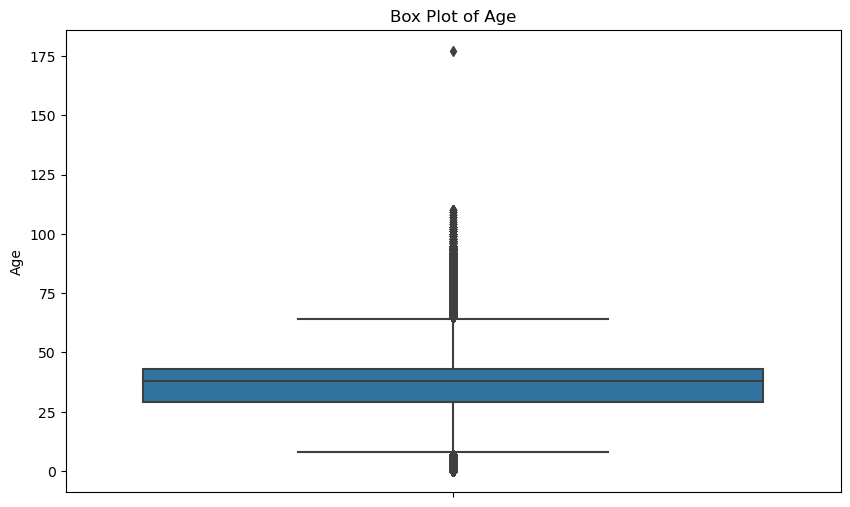

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='AGE', data=traffic_crashes_people)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

In [76]:
# using Percentiles
Q1 = traffic_crashes_people['AGE'].quantile(0.25)
Q3 = traffic_crashes_people['AGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

outliers = traffic_crashes_people[(traffic_crashes_people['AGE'] < lower_bound) | (traffic_crashes_people['AGE'] > upper_bound)]
print("Outliers based on IQR method:")
# print(outliers)



8.0
64.0
Outliers based on IQR method:


In [77]:
# to deal with Outliers

traffic_crashes_people['AGE'] = np.where(traffic_crashes_people['AGE'] < lower_bound, lower_bound, traffic_crashes_people['AGE'])
traffic_crashes_people['AGE'] = np.where(traffic_crashes_people['AGE'] > upper_bound, upper_bound, traffic_crashes_people['AGE'])


In [78]:
traffic_crashes_people['AGE']

0          25.000000
1          37.000000
2          37.903663
3          37.903663
4          37.903663
             ...    
1808600    64.000000
1808601    34.000000
1808602    44.000000
1808603    16.000000
1808604    18.000000
Name: AGE, Length: 1808605, dtype: float64

In [79]:
## using Standard Deviation
# mean_age = traffic_crashes_people['AGE'].mean()
# std_age = traffic_crashes_people['AGE'].std()

# lower_bound = mean_age - 3 * std_age
# upper_bound = mean_age + 3 * std_age

# print(lower_bound)
# print(upper_bound)

# outliers = traffic_crashes_people[(traffic_crashes_people['AGE'] < lower_bound) | (traffic_crashes_people['AGE'] > upper_bound)]
# print("Outliers based on Standard Deviation method:")
# print(outliers)


In [80]:
traffic_crashes_people['SEX'].replace({'M': 1, 'F': 0, 'X': 2}, inplace=True)

traffic_crashes_people['SEX'].value_counts()

SEX
1    934741
0    679418
2    194446
Name: count, dtype: int64

In [81]:

def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound)
    print(upper_bound)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(traffic_crashes_people['SEX'])
print(outliers)

-1.5
2.5
Series([], Name: SEX, dtype: int64)


c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


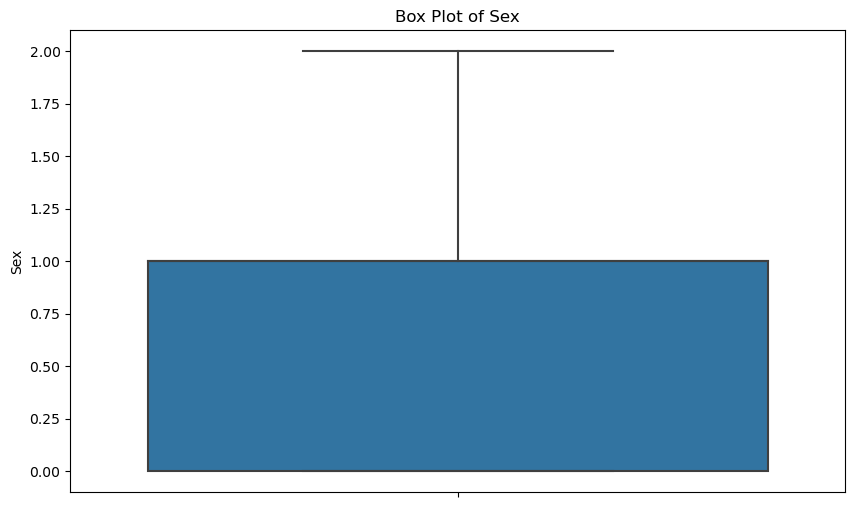

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='SEX', data=traffic_crashes_people)
plt.title('Box Plot of Sex')
plt.ylabel('Sex')
plt.show()

# traffic_crashes_vehicles 

In [83]:
# traffic_crashes_vehicles 

In [84]:
# traffic_crashes_vehicles.shape

In [85]:
# traffic_crashes_vehicles .dtypes

In [86]:
# traffic_crashes_vehicles .nunique()

# traffic_crashes 

In [87]:
traffic_crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,823957.000000,1.990100e+05,823957.000000,823952.000000,822158.000000,822158.000000,822158.000000,822158.000000,822158.000000,822158.000000,822158.0,823957.000000,823957.000000,823957.000000,818267.000000,818267.000000
mean,28.407031,1.333011e+01,3689.550634,1243.940685,0.190162,0.001186,0.019867,0.107194,0.061915,2.003105,0.0,13.198498,4.122309,6.633585,41.854908,-87.673596
std,6.161584,2.961594e+03,2885.982747,705.190829,0.566358,0.037267,0.164920,0.422487,0.319603,1.157095,0.0,5.570536,1.981003,3.449178,0.335164,0.681035
min,0.000000,0.000000e+00,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1250.000000,714.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782557,-87.721764
50%,30.000000,2.000000e+00,3201.000000,1212.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874827,-87.674195
75%,30.000000,4.000000e+00,5600.000000,1822.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924410,-87.633428
max,99.000000,1.191625e+06,451100.000000,6100.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [88]:
traffic_crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [89]:
traffic_crashes.nunique()

CRASH_RECORD_ID                  823957
CRASH_DATE_EST_I                      2
CRASH_DATE                       541195
POSTED_SPEED_LIMIT                   46
TRAFFIC_CONTROL_DEVICE               19
DEVICE_CONDITION                      8
WEATHER_CONDITION                    12
LIGHTING_CONDITION                    6
FIRST_CRASH_TYPE                     18
TRAFFICWAY_TYPE                      20
LANE_CNT                             41
ALIGNMENT                             6
ROADWAY_SURFACE_COND                  7
ROAD_DEFECT                           7
REPORT_TYPE                           3
CRASH_TYPE                            2
INTERSECTION_RELATED_I                2
NOT_RIGHT_OF_WAY_I                    2
HIT_AND_RUN_I                         2
DAMAGE                                3
DATE_POLICE_NOTIFIED             625311
PRIM_CONTRIBUTORY_CAUSE              40
SEC_CONTRIBUTORY_CAUSE               40
STREET_NO                         11731
STREET_DIRECTION                      4


In [90]:
traffic_crashes.isnull().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 762398
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         624947
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       24578
CRASH_TYPE                            0
INTERSECTION_RELATED_I           635017
NOT_RIGHT_OF_WAY_I               785972
HIT_AND_RUN_I                    565983
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [91]:
traffic_crashes.dtypes

CRASH_RECORD_ID                   object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                         float64
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION

In [92]:
columns_to_drop =['PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','INJURIES_FATAL','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','LATITUDE','LONGITUDE','LOCATION']
traffic_crashes.drop(columns_to_drop,axis=1,inplace=True)
# traffic_crashes

### randomly fill nan
columns: `CRASH_DATE_EST_I` * `LANE_CNT` * `INTERSECTION_RELATED_I` * `NOT_RIGHT_OF_WAY_I` * `HIT_AND_RUN_I` * `DOORING_I` * `WORK_ZONE_I` 

In [93]:
import numpy as np
# trafficCrashesDf1 = trafficCrashesDf.copy()
uniqueCategories = traffic_crashes['CRASH_DATE_EST_I'].dropna().unique()
uniqueCategories

array(['Y', 'N'], dtype=object)

In [94]:
def random(column):
    np.random.seed(42)  # For reproducibility
    traffic_crashes[column] = traffic_crashes[column].apply(
    lambda x: np.random.choice(uniqueCategories) if pd.isna(x) else x
    )   

In [95]:
random('CRASH_DATE_EST_I')
random('LANE_CNT')
random('INTERSECTION_RELATED_I')
random('NOT_RIGHT_OF_WAY_I')
random('HIT_AND_RUN_I')
random('DOORING_I')
random('WORK_ZONE_I')

In [96]:
# trafficCrashesDf

### Mode 
columns: `REPORT_TYPE` * `STREET_DIRECTION` * `STREET_NAME` * `MOST_SEVERE_INJURY`

### Mean 
columns: `BEAT_OF_OCCURRENCE` * `INJURIES_TOTAL` 

In [97]:
def checkValues(column):
    uniqueCategories = traffic_crashes[column].unique()
    nullCount= traffic_crashes[column].isnull().sum()
    print('unique Categories: ',uniqueCategories,'\nnull count: ', nullCount)
    print('Mode:\n',traffic_crashes[column].value_counts())
    return traffic_crashes[column].mode()[0]

In [98]:
# REPORT_TYPE
uniqueCategoriesReportType = checkValues('REPORT_TYPE')

unique Categories:  ['ON SCENE' 'NOT ON SCENE (DESK REPORT)' nan 'AMENDED'] 
null count:  24578
Mode:
 REPORT_TYPE
NOT ON SCENE (DESK REPORT)    450834
ON SCENE                      348305
AMENDED                          240
Name: count, dtype: int64


In [99]:
traffic_crashes['REPORT_TYPE'].fillna(uniqueCategoriesReportType, inplace=True)

In [100]:
# STREET_DIRECTION
uniqueCategoriesStreetDirection = checkValues('STREET_DIRECTION')

unique Categories:  ['W' 'S' 'N' 'E' nan] 
null count:  4
Mode:
 STREET_DIRECTION
W    294596
S    275883
N    197482
E     55992
Name: count, dtype: int64


In [101]:
traffic_crashes['REPORT_TYPE'].fillna(uniqueCategoriesStreetDirection, inplace=True)

In [102]:
# STREET_NAME
uniqueCategoriesStreetName = checkValues('STREET_NAME')

unique Categories:  ['OHARE ST' 'ASHLAND AVE' 'LONG AVE' ... 'MC FETRIDGE SD'
 'UPPER ROADWAY ST' '29TH PL'] 
null count:  1
Mode:
 STREET_NAME
WESTERN AVE       22485
PULASKI RD        19869
CICERO AVE        18484
ASHLAND AVE       17890
HALSTED ST        15972
                  ...  
NASHOTAH AVE          1
MC CLELLAN AVE        1
LAKE SHORE  DR        1
UNKNOWN               1
29TH PL               1
Name: count, Length: 1641, dtype: int64


In [103]:
traffic_crashes['STREET_NAME'].fillna(uniqueCategoriesStreetName,inplace=True)

In [104]:
# MOST_SEVERE_INJURY
uniqueCategoriesMostSevereInjury = checkValues('MOST_SEVERE_INJURY')

unique Categories:  ['NONINCAPACITATING INJURY' 'NO INDICATION OF INJURY' 'FATAL'
 'REPORTED, NOT EVIDENT' 'INCAPACITATING INJURY' nan] 
null count:  1812
Mode:
 MOST_SEVERE_INJURY
NO INDICATION OF INJURY     708627
NONINCAPACITATING INJURY     63989
REPORTED, NOT EVIDENT        34727
INCAPACITATING INJURY        13900
FATAL                          902
Name: count, dtype: int64


In [105]:
traffic_crashes['MOST_SEVERE_INJURY'].fillna(uniqueCategoriesMostSevereInjury, inplace=True)

In [106]:
def calculateMean(column):
    return traffic_crashes[column].mean()

In [107]:
# BEAT_OF_OCCURRENCE`
meanBeatOfOccurrence = calculateMean('BEAT_OF_OCCURRENCE')
traffic_crashes['BEAT_OF_OCCURRENCE'].fillna(meanBeatOfOccurrence, inplace=True)

In [108]:
# INJURIES_TOTAL
meanInjuriesTotal = calculateMean('INJURIES_TOTAL')
traffic_crashes['INJURIES_TOTAL'].fillna(meanInjuriesTotal, inplace=True)

In [109]:
traffic_crashes.to_csv('clean_data/traffic-crashes-normal-fill.csv',index=False)

# [b] From Raw to Information

### [i]


In [110]:
traffic_crashes_vehicles['CRASH_DATE'] = pd.to_datetime(traffic_crashes_vehicles['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

traffic_crashes_vehicles['YEAR'] = traffic_crashes_vehicles['CRASH_DATE'].dt.year

print(traffic_crashes_vehicles[['CRASH_DATE', 'YEAR']].head())


           CRASH_DATE  YEAR
0 2023-12-06 15:24:00  2023
1 2023-12-06 16:00:00  2023
2 2023-12-06 16:30:00  2023
3 2023-12-10 12:12:00  2023
4 2023-12-10 12:12:00  2023


In [111]:
# traffic_crashes
traffic_crashes['CRASH_DATE'] = pd.to_datetime(traffic_crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

traffic_crashes['YEAR'] = traffic_crashes['CRASH_DATE'].dt.year

print(traffic_crashes[['CRASH_DATE', 'YEAR']].head())


           CRASH_DATE  YEAR
0 2023-08-18 12:50:00  2023
1 2023-07-29 14:45:00  2023
2 2023-08-18 17:58:00  2023
3 2019-11-26 08:38:00  2019
4 2023-08-18 10:45:00  2023


In [112]:
# traffic_crashes_people

traffic_crashes_people['CRASH_DATE'] = pd.to_datetime(traffic_crashes_people['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

traffic_crashes_people['YEAR'] = traffic_crashes_people['CRASH_DATE'].dt.year

print(traffic_crashes_people[['CRASH_DATE', 'YEAR']].head())


           CRASH_DATE  YEAR
0 2019-09-28 03:30:00  2019
1 2020-04-13 22:50:00  2020
2 2015-11-01 05:00:00  2015
3 2015-11-01 08:00:00  2015
4 2015-11-01 10:15:00  2015


### [ii]

In [113]:
# calculating the number of pass without the driver

passengers = traffic_crashes_people[(traffic_crashes_people['PERSON_TYPE'] != 'DRIVER') & (traffic_crashes_people['PERSON_TYPE'] != 'PEDESTRIAN')]

passenger_count_per_vehicle = passengers.groupby('VEHICLE_ID').size().reset_index(name='PASSENGER_COUNT')

# the reser_index converts the data into dataframe and renames the column
# the size() function used to count the number of rows in each grouped by

# passenger_count_per_vehicle


In [114]:
merged_data = pd.merge(passengers, passenger_count_per_vehicle, on='VEHICLE_ID')
result = merged_data.groupby('CRASH_RECORD_ID').agg(
    AVERAGE_PASSENGERS=('PASSENGER_COUNT', 'mean'),
    AVERAGE_AGE=('AGE', 'mean')
).reset_index()

In [115]:
# result

### [iii]

In [116]:
no_veh = traffic_crashes_vehicles[['CRASH_UNIT_ID','CRASH_RECORD_ID']].groupby('CRASH_RECORD_ID').size().reset_index(name='NO. veh')

In [117]:
no_veh

,CRASH_RECORD_ID,NO. veh
0,000013b0123279411e0ec856dae95ab9f0851764350b7f...,2
1,00002c0771fb6f2c70ba775b7f6b501608cadea85c1dd1...,2
2,000043c6564ec4d54bc4efd957d97ca97f38a965dd64b4...,1
3,00005696946846c8b8a1d378dba4e2a5ed84a9b2876fe0...,1
4,000070ed7a6357c3298f5edc6fb7d5ce925a10f46660f3...,2
...,...,...
823952,ffffc784918a94c6d5ec9cdced500004faafc6a9e6e01b...,2
823953,ffffc802346fd6f48f99117898fbc558237a3052c327b8...,2
823954,ffffd143cf6dc784876069140869d2d724080089450108...,2
823955,ffffe467b0d2d95c897e8c2721941f87dede1661a3b60c...,2


### [iv]

In [123]:
def classify_vehicle_age(age):
    if age >= 30:
        return 'Vintage'
    elif 10 <= age < 30:
        return 'Old'
    elif 1 <= age:
        return 'New'
    else :
        return "None"

In [124]:
traffic_crashes_vehicles['CRASH_DATE'] = pd.to_datetime(traffic_crashes_vehicles['CRASH_DATE'])

In [125]:
traffic_crashes_vehicles['VEHICLE_AGE'] = traffic_crashes_vehicles['CRASH_DATE'].dt.year - traffic_crashes_vehicles['VEHICLE_YEAR']
traffic_crashes_vehicles['VEHICLE_AGE_CATEGORY'] = traffic_crashes_vehicles['VEHICLE_AGE'].apply(classify_vehicle_age)

In [126]:
unique_classes = traffic_crashes_vehicles['VEHICLE_AGE_CATEGORY'].unique()

unique_classes_list = ', '.join(unique_classes)

print("Unique vehicle age categories:")
print(unique_classes_list)

Unique vehicle age categories:
Old, New, None, Vintage


### [v]

In [128]:
traffic_crashes_vehicles['VEHICLE_AGE_BIN'] = pd.Categorical(traffic_crashes_vehicles['VEHICLE_AGE_CATEGORY'], categories=['قديم', 'جديد', 'مختلط'])


### [vi]

In [131]:
traffic_crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'DOORING_I',
       'WORK_ZONE_I', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'YEAR'],
      dtype='object')

In [104]:
from sklearn.impute import KNNImputer

columns_for_imputation = ['LATITUDE', 'LONGITUDE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'POSTED_SPEED_LIMIT']

df_impute = traffic_crashes[columns_for_imputation]

imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df_impute), columns=columns_for_imputation)

traffic_crashes['LATITUDE'] = df_imputed['LATITUDE']
traffic_crashes['LONGITUDE'] = df_imputed['LONGITUDE']

print(traffic_crashes[['LATITUDE', 'LONGITUDE']].isnull().sum())

LATITUDE     0
LONGITUDE    0
dtype: int64


In [105]:
import geohash2

"""
يعتمد عدد البتات المستخدمة في عملية التهشير على مستوى الدقة المطلوب. كلما زاد عدد البتات
، كانت المساحة الجغرافية الممثلة أصغر وأكثر دقة. عادةً
، يتم استخدام مستوى دقة يتراوح بين 5 و12 حرفاً (حيث يمثل كل حرف حوالي 5 بتات).
"""

precision = 6

traffic_crashes['GEOHASH'] = traffic_crashes.apply(lambda row: geohash2.encode(row['LATITUDE'], row['LONGITUDE'], precision=precision), axis=1)

grouped = traffic_crashes.groupby('GEOHASH').size().reset_index(name='CRASH_COUNT')

grouped

,GEOHASH,CRASH_COUNT
0,7zzzzz,49
1,dmyneg,2
2,dmyns5,1
3,dp3qwy,5
4,dp3qxj,28
...,...,...
1144,dp3xhb,1062
1145,dp3xhc,876
1146,dp3xj0,742
1147,dp3xj1,686


### [vii]

In [ ]:
values = grouped['CRASH_COUNT'].sort_values()
values.max()

In [ ]:
# so we notice that's max crash count is 7252 so we devide it by 3
print(values.max()*(1/3))
print(values.max()*(2/3))

In [ ]:
# we make ranges like this:
# x < 2417 --> رمادي
# x > 2417 & x < 4834 --> أصفر
# x < 7252 --> أحمر
# but this method male the grey like 99% and the red + yellow = 1% 


def make_category(input):
    if input < 2417:
        return 'رمادي'
    elif input >= 2417 and input <= 4834:
        return 'أصفر'
    elif input <= 7252:
        return 'أحمر'
    

grouped['CATEGORY'] = grouped['CRASH_COUNT'].apply(make_category)

grouped

In [ ]:
# we can change the rules to like this:
# grey 63% , red 3% and yellow 33%

def make_category(input):
    if input < 800:
        return 'رمادي'
    elif input >= 800 and input <= 2000:
        return 'أصفر'
    elif input <= 7252:
        return 'أحمر'
    

grouped['CATEGORY'] = grouped['CRASH_COUNT'].apply(make_category)

grouped

### [viii]

### [ix]

### [x]

### [xi]

### [xii]

# Question [2]: Data Analysis and Information Discovery

## [a] Traffic Accidents Causes


### [i]

In [58]:
primary_reason_count = traffic_crashes.groupby('PRIM_CONTRIBUTORY_CAUSE').size().reset_index(name='no. of crushes')

In [60]:
primary_reason_count.head()

,PRIM_CONTRIBUTORY_CAUSE,no. of crushes
0,ANIMAL,702
1,BICYCLE ADVANCING LEGALLY ON RED LIGHT,81
2,CELL PHONE USE OTHER THAN TEXTING,1089
3,DISREGARDING OTHER TRAFFIC SIGNS,1775
4,DISREGARDING ROAD MARKINGS,1002


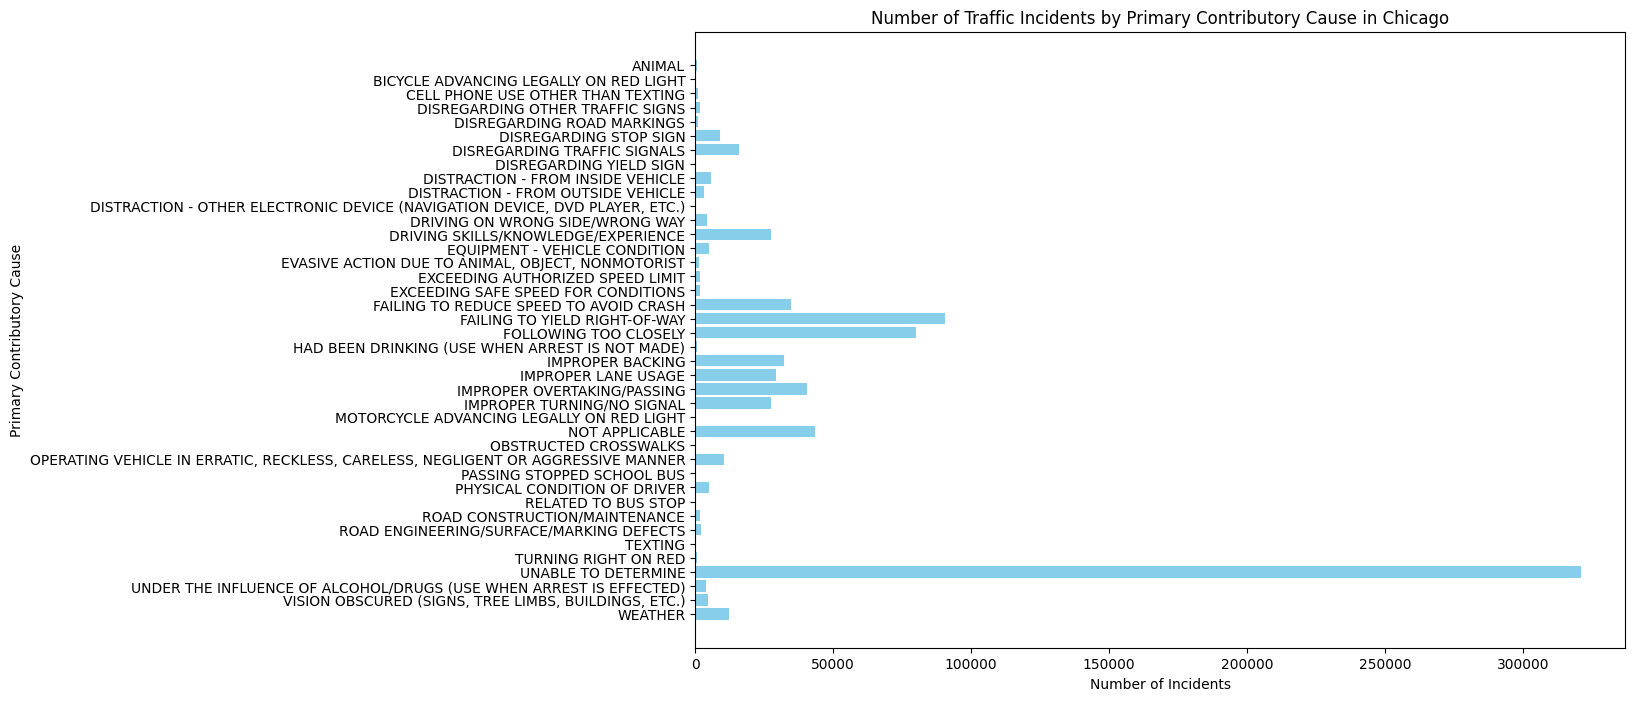

In [70]:
plt.figure(figsize=(12, 8))
plt.barh(primary_reason_count['PRIM_CONTRIBUTORY_CAUSE'], primary_reason_count['no. of crushes'], color='skyblue')
plt.xlabel('Number of Incidents')
plt.ylabel('Primary Contributory Cause')
plt.title('Number of Traffic Incidents by Primary Contributory Cause in Chicago')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

C:\Users\Tony\AppData\Local\Temp\ipykernel_10892\2557524469.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='category')


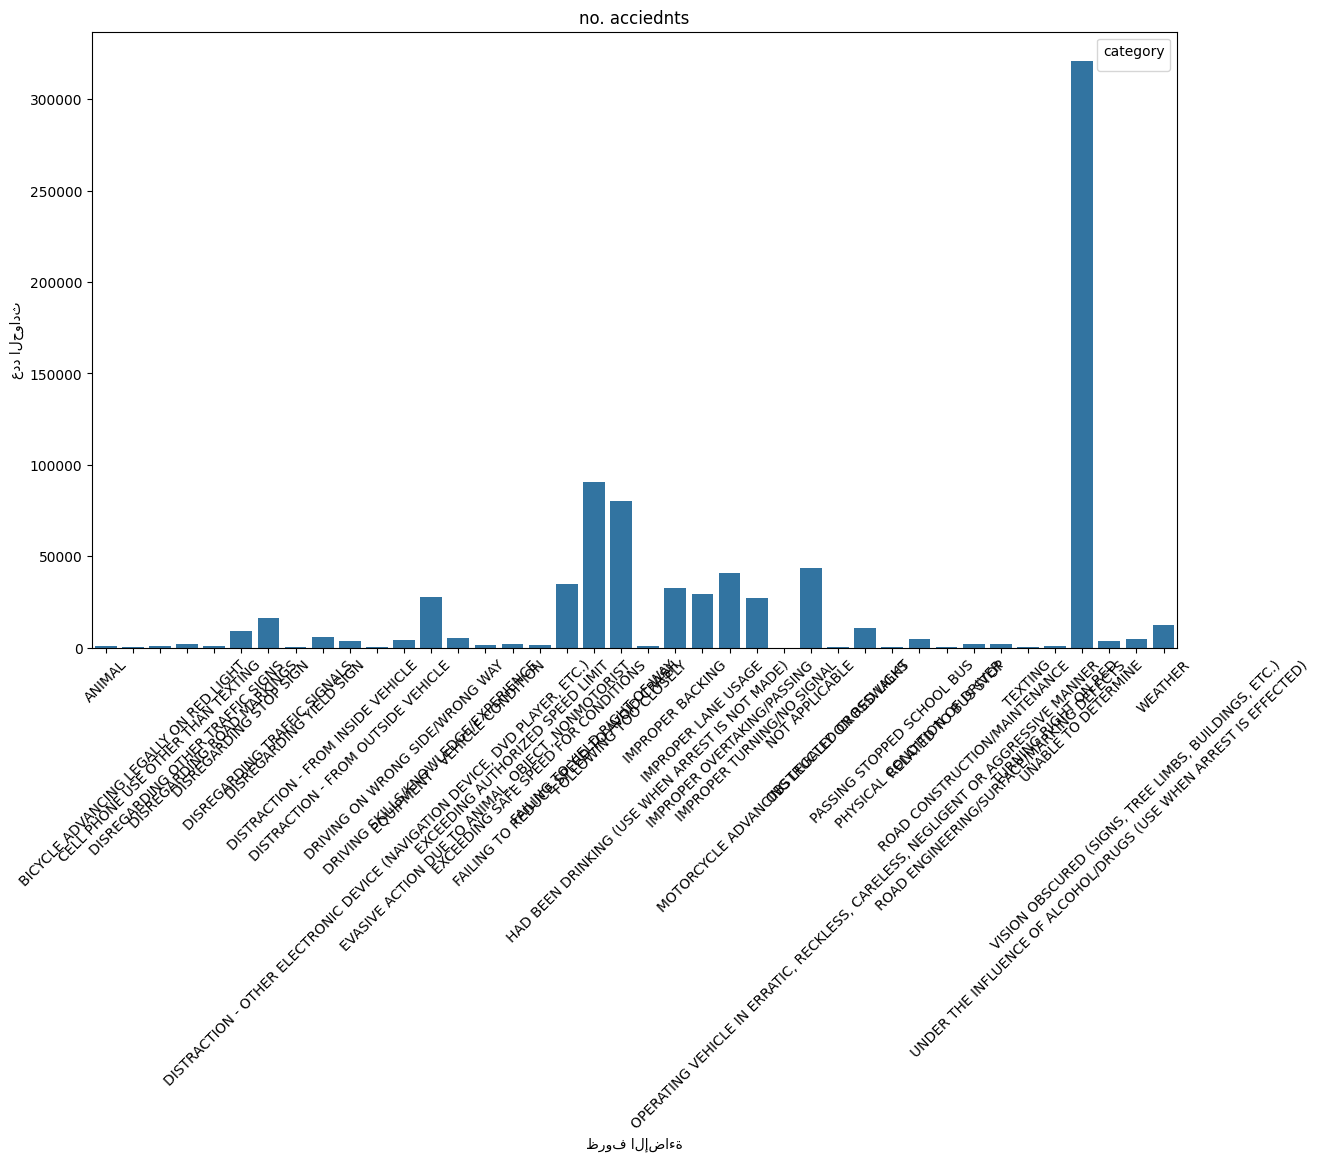

In [71]:
plt.figure(figsize=(14, 8))
sns.barplot(data=primary_reason_count, x='PRIM_CONTRIBUTORY_CAUSE', y='no. of crushes')
plt.title('no. acciednts')
plt.xlabel('ظروف الإضاءة')
plt.ylabel('عدد الحوادث')
plt.xticks(rotation=45)
plt.legend(title='category')
plt.show()

### [ii]

In [66]:
lighting_damage_count = traffic_crashes.groupby(['LIGHTING_CONDITION', 'DAMAGE']).size().reset_index(name='lighting_damage_count')
lighting_damage_count.head()

,LIGHTING_CONDITION,DAMAGE,lighting_damage_count
0,DARKNESS,$500 OR LESS,4310
1,DARKNESS,"$501 - $1,500",10558
2,DARKNESS,"OVER $1,500",24508
3,"DARKNESS, LIGHTED ROAD",$500 OR LESS,17640
4,"DARKNESS, LIGHTED ROAD","$501 - $1,500",38617


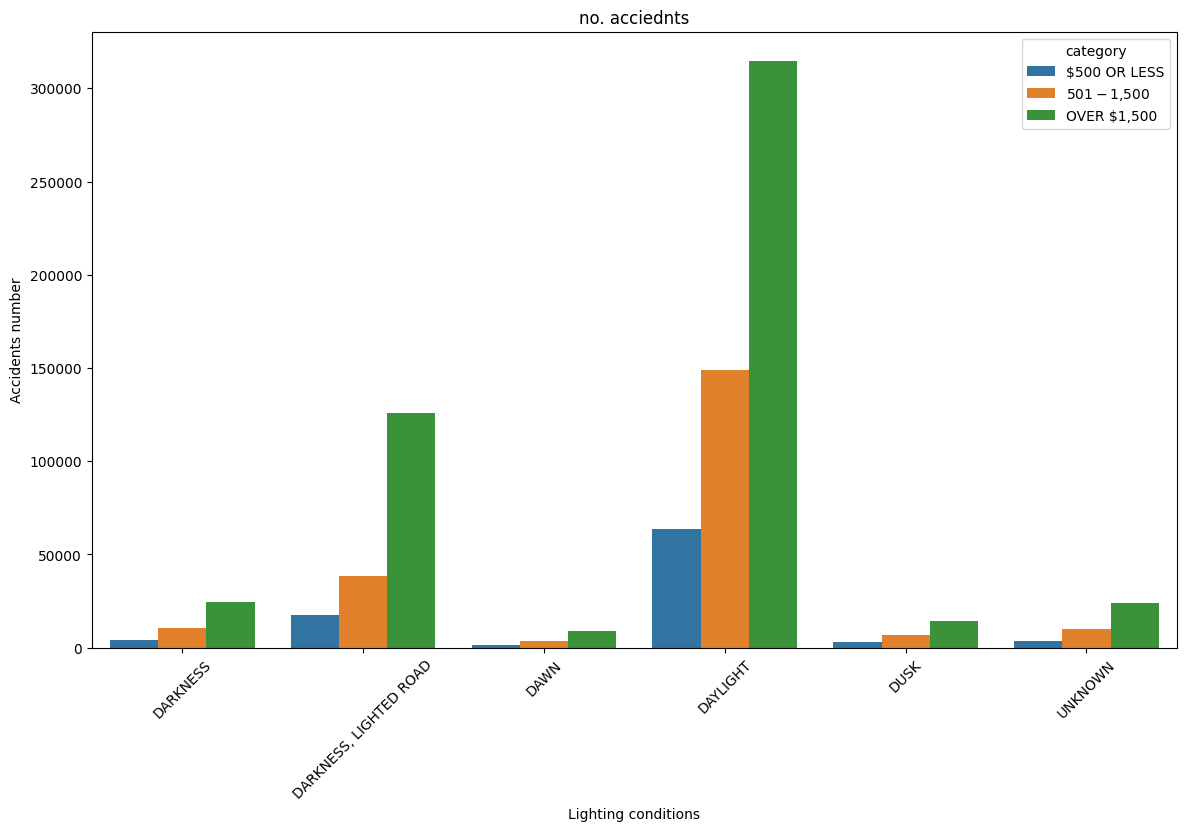

In [72]:
plt.figure(figsize=(14, 8))
sns.barplot(data=lighting_damage_count, x='LIGHTING_CONDITION', y='lighting_damage_count', hue='DAMAGE')
plt.title('no. acciednts')
plt.xlabel('Lighting conditions')
plt.ylabel('Acciednts')
plt.xticks(rotation=45)
plt.legend(title='category')
plt.show()

### [iii]

In [83]:
crush_type = traffic_crashes.groupby(['CRASH_TYPE','FIRST_CRASH_TYPE']).size().reset_index(name='crush count')
crush_type.head()

,CRASH_TYPE,FIRST_CRASH_TYPE,crush count
0,INJURY AND / OR TOW DUE TO CRASH,ANGLE,37717
1,INJURY AND / OR TOW DUE TO CRASH,ANIMAL,75
2,INJURY AND / OR TOW DUE TO CRASH,FIXED OBJECT,20596
3,INJURY AND / OR TOW DUE TO CRASH,HEAD ON,3633
4,INJURY AND / OR TOW DUE TO CRASH,OTHER NONCOLLISION,912


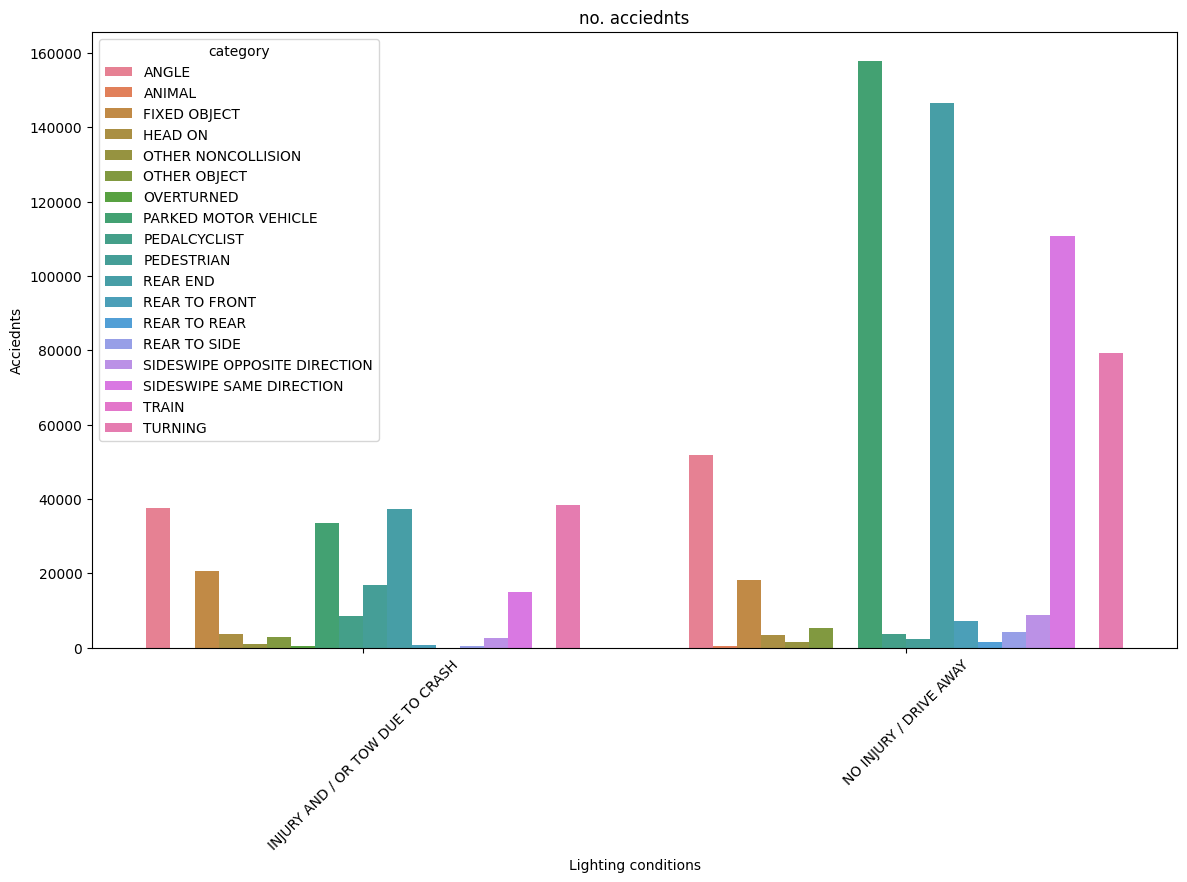

In [84]:
plt.figure(figsize=(14, 8))
sns.barplot(data=crush_type, x='CRASH_TYPE', y='crush count', hue='FIRST_CRASH_TYPE')
plt.title('no. acciednts')
plt.xlabel('Lighting conditions')
plt.ylabel('Acciednts')
plt.xticks(rotation=45)
plt.legend(title='category')
plt.show()

### [iv]

In [85]:
light_type = traffic_crashes.groupby(['TRAFFICWAY_TYPE','LIGHTING_CONDITION']).size().reset_index(name='crush count')
light_type.head()

,TRAFFICWAY_TYPE,LIGHTING_CONDITION,crush count
0,ALLEY,DARKNESS,874
1,ALLEY,"DARKNESS, LIGHTED ROAD",2330
2,ALLEY,DAWN,214
3,ALLEY,DAYLIGHT,9151
4,ALLEY,DUSK,370


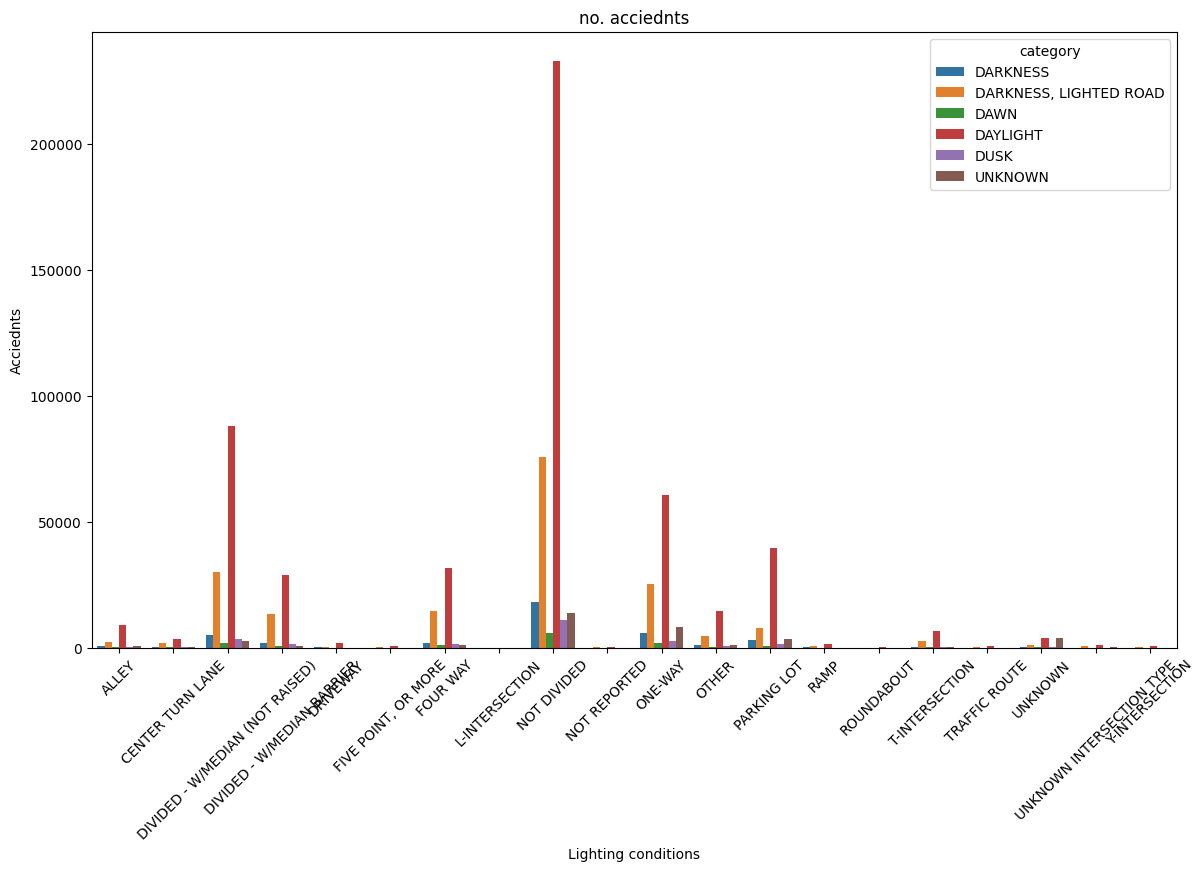

In [86]:
plt.figure(figsize=(14, 8))
sns.barplot(data=light_type, x='TRAFFICWAY_TYPE', y='crush count', hue='LIGHTING_CONDITION')
plt.title('no. acciednts')
plt.xlabel('Lighting conditions')
plt.ylabel('Acciednts')
plt.xticks(rotation=45)
plt.legend(title='category')
plt.show()

# ما انحل لساv

## [b] Traffic Accidents History


### [i]

In [88]:
hour_damage = traffic_crashes.groupby(['CRASH_HOUR','DAMAGE']).size().reset_index(name='crush count')
hour_damage.head()

,CRASH_HOUR,DAMAGE,crush count
0,0,$500 OR LESS,1494
1,0,"$501 - $1,500",3497
2,0,"OVER $1,500",12881
3,1,$500 OR LESS,1204
4,1,"$501 - $1,500",2839


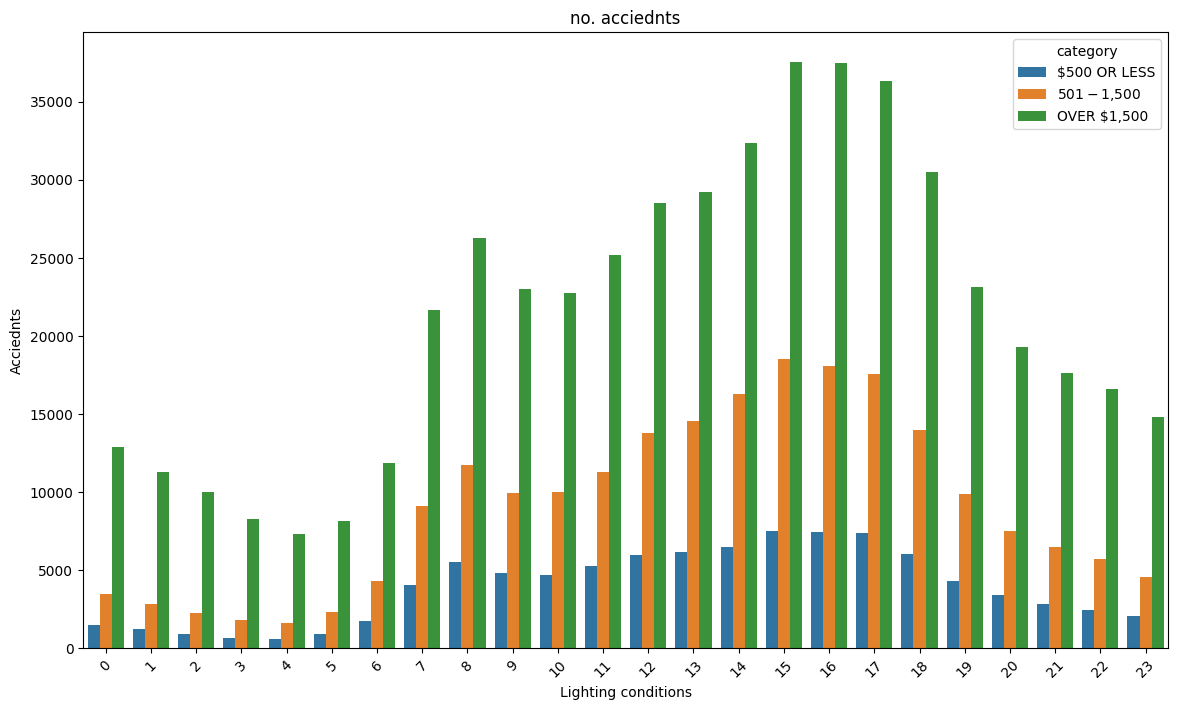

In [89]:
plt.figure(figsize=(14, 8))
sns.barplot(data=hour_damage, x='CRASH_HOUR', y='crush count', hue='DAMAGE')
plt.title('no. acciednts')
plt.xlabel('Lighting conditions')
plt.ylabel('Acciednts')
plt.xticks(rotation=45)
plt.legend(title='category')
plt.show()

### [ii]

In [92]:
traffic_crashes['CRASH_DATE'] = pd.to_datetime(traffic_crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

traffic_crashes['YEAR'] = traffic_crashes['CRASH_DATE'].dt.year

# print(traffic_crashes[['CRASH_DATE', 'YEAR']].head())

month_year = traffic_crashes.groupby(['YEAR','CRASH_MONTH']).size().reset_index(name='crush count')
month_year.head()

,YEAR,CRASH_MONTH,crush count
0,2013,3,1
1,2013,6,1
2,2014,1,2
3,2014,2,1
4,2014,6,1


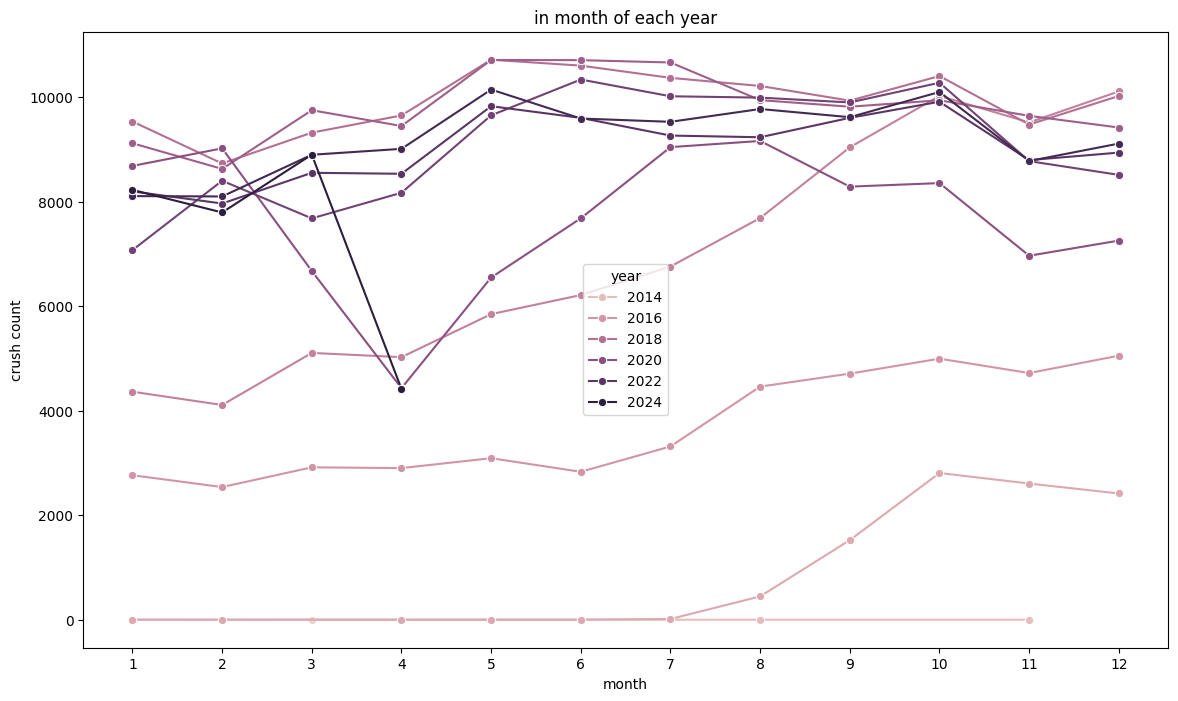

In [97]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=month_year, x='CRASH_MONTH', y='crush count', hue='YEAR', marker='o')
plt.title('in month of each year')
plt.xlabel('month')
plt.ylabel('crush count')
plt.xticks(range(1, 13))
plt.legend(title='year')
plt.show()

### [iii]

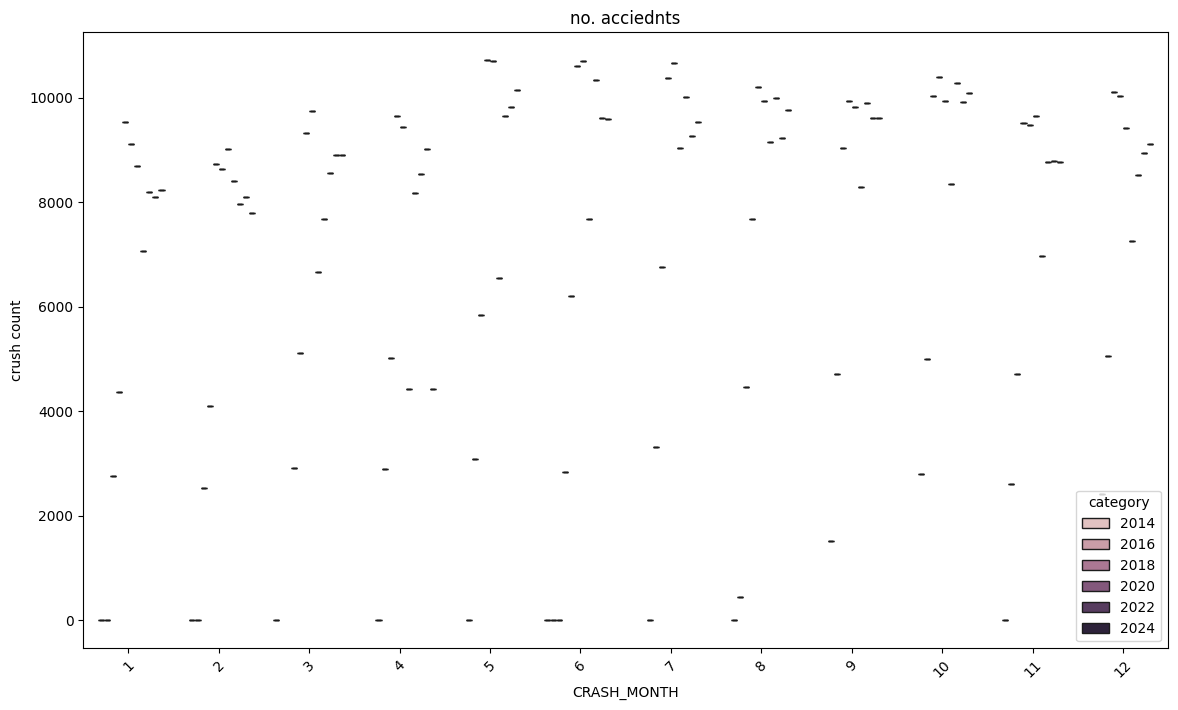

In [110]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=month_year, x='CRASH_MONTH', y='crush count', hue='YEAR')
plt.title('no. acciednts')
plt.xlabel('CRASH_MONTH')
plt.ylabel('crush count')
plt.xticks(rotation=45)
plt.legend(title='category')
plt.show()


### [iv]

In [100]:
crash_day = traffic_crashes.groupby('CRASH_DAY_OF_WEEK').size().reset_index(name='crush count')
crash_day

,CRASH_DAY_OF_WEEK,crush count
0,1,102435
1,2,113432
2,3,117367
3,4,116537
4,5,118189
5,6,133867
6,7,122130


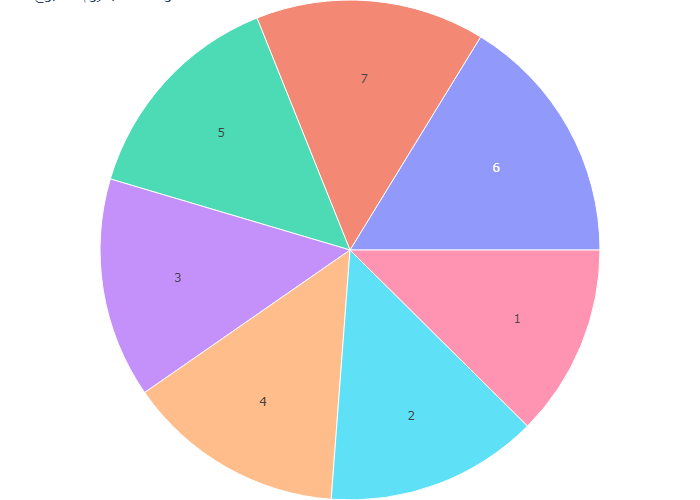

In [103]:
import plotly.io as pio

fig = px.sunburst(crash_day, path=['CRASH_DAY_OF_WEEK'], values='crush count', title='عدد الحوادث حسب يوم الأسبوع')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
pio.write_image(fig, 'sunburst_plot.png')

from IPython.display import Image
Image(filename='sunburst_plot.png')

## [c] Spatial Analysis


### [i]

In [107]:
grouped = traffic_crashes.groupby('GEOHASH').size().reset_index(name='CRASH_COUNT')
grouped.head()

,GEOHASH,CRASH_COUNT
0,7zzzzz,49
1,dmyneg,2
2,dmyns5,1
3,dp3qwy,5
4,dp3qxj,28


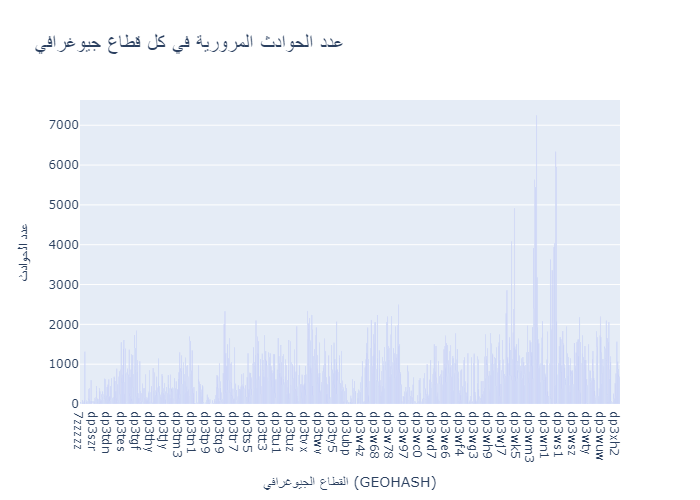

In [109]:
fig = px.bar(grouped, x='GEOHASH', y='CRASH_COUNT', title='عدد الحوادث المرورية في كل قطاع جيوغرافي')
fig.update_layout(xaxis_title='القطاع الجيوغرافي (GEOHASH)', yaxis_title='عدد الحوادث', title_font_size=20)
pio.write_image(fig, 'grouped.png')

Image(filename='grouped.png')



### [ii]

### [iii]

### [iv]

### [v]

### [vi]

## [d] Passengers Cases Analysis


### [i]

### [ii]

### [iii]

### [iv]

### [v]

## [e] Outlier Detection

### [i]

# Question [4]: Do What you Have to Do